Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log


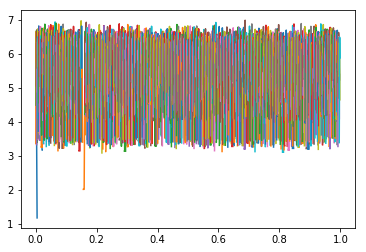

In [2]:
import sys, os, os.path
import glob

import scipy as sp
import numpy as np

import matplotlib
import matplotlib.pyplot as pp
from mpl_toolkits.mplot3d import Axes3D

import yt
from yt.frontends.boxlib.data_structures import AMReXDataset

from tempfile import TemporaryFile


%pylab inline

location='/home/kevinluna/FHDeX/exec/_GL_alt/Umbrella_Full_J_Run/data' #data file location
list = os.listdir("./data")
list2=list
Number_of_Umbrellas=len(list) 
dat = np.loadtxt('./data/data0.100',usecols=[0],unpack=True) #any of the files should work
Number_of_Samples_in_Umb=dat.shape[0]




i=0
for file in list2:
    list2[i] = (file[:9] ) if len(file) > 9 else file
    i=i+1

i=0
for file in list2:
    list2[i] = '{:<09}'.format(file)  if len(file) < 9 else file
    i=i+1  

    
list = os.listdir("./data")
i=0  
for filename in os.listdir("./data"): 
        src ='data/'+filename 
        dst ='data/'+list2[i] 
        #rint(src)
        #print(dst)
        os.rename(src, dst) 
        #print(i)
        i=i+1 

dat_array=numpy.zeros(shape=(Number_of_Samples_in_Umb,Number_of_Umbrellas),dtype=float64)

i=0
for filename in sorted(os.listdir("./data")):    
    a=os.path.join(location, filename)
    dat_array[:,i]=np.loadtxt(a)
    i=i+1
    
i=0
nbins=10
for i in range (1000):   
    histx,binsx=np.histogram(dat_array[:,i],bins=nbins,density=True)
    centerx = (binsx[:-1]+binsx[1:])/2
    pp.plot(centerx,np.log(histx))  


/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


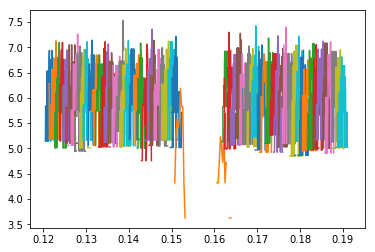

In [146]:
i=0
nbins=50
for i in range (130,190):   
    histx,binsx=np.histogram(dat_array[:,i],bins=nbins,density=True)
    centerx = (binsx[:-1]+binsx[1:])/2
    pp.plot(centerx,np.log(histx))  

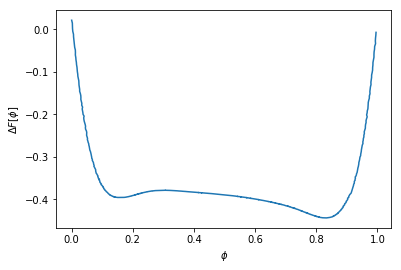

In [8]:
dat = np.loadtxt('FE.txt',unpack=True)
dat.shape
plt.plot(dat[1,:],dat[0,:])
plt.xlabel('$\phi$')
plt.ylabel('$\Delta F[\phi]$')
plt.savefig('Result1.png')